In [1]:
import pandas as pd
import numpy as np

In [68]:
print('https://www.datacamp.com/tutorial/moving-averages-in-pandas')
df = pd.DataFrame({'months': list(range(1,13)), 'demand':[290,260,288,300,310,303,329,340,316,330,308,310]})
df.head()

https://www.datacamp.com/tutorial/moving-averages-in-pandas


,months,demand
0,1,290
1,2,260
2,3,288
3,4,300
4,5,310


In [21]:
W = 3
for i in range(df.shape[0]-(W-1)):
    df.loc[df.index[i+W-1], "SMA_3"] = np.round( sum(df.iloc[i+j,1] for j in range(W)) / W, 2)
df["Pandas SMA_3"] = df.iloc[:,1].rolling(W).mean()
df.head(5)

,months,demand,SMA_3,Pandas SMA_3,SMA_4,Pandas SMA_4
0,1,290,NaN,NaN,NaN,NaN
1,2,260,NaN,NaN,NaN,NaN
2,3,288,279.33,279.333333,NaN,NaN
3,4,300,282.67,282.666667,379.33,284.5
4,5,310,299.33,299.333333,386.00,289.5


In [22]:
W = 4
for i in range(df.shape[0]-(W-1)):
    df.loc[df.index[i+W-1], "SMA_4"] = np.round( sum(df.iloc[i+j,1] for j in range(W)) / W, 2)
df["Pandas SMA_4"] = df.iloc[:,1].rolling(W).mean()
df.head(5)

,months,demand,SMA_3,Pandas SMA_3,SMA_4,Pandas SMA_4
0,1,290,NaN,NaN,NaN,NaN
1,2,260,NaN,NaN,NaN,NaN
2,3,288,279.33,279.333333,NaN,NaN
3,4,300,282.67,282.666667,284.5,284.5
4,5,310,299.33,299.333333,289.5,289.5


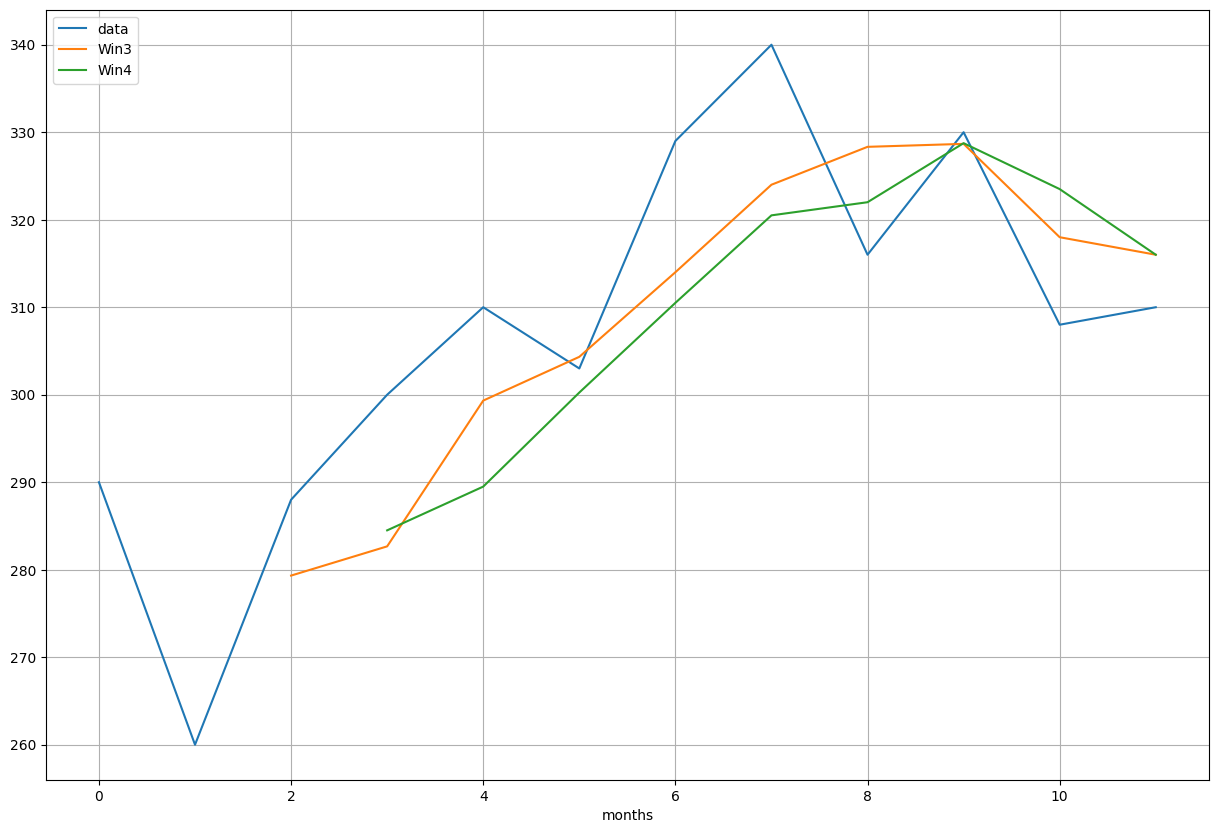

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df["demand"], label='data')
plt.plot(df["SMA_3"], label='Win3')
plt.plot(df["SMA_4"], label='Win4')
plt.xlabel('months');
plt.legend(loc=2);


In [38]:
df = pd.read_csv('data/AirQualityUCI.csv', sep=';', decimal=',')
df = df.iloc[ : , 0:14]
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6


In [39]:
df.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
dtype: int64

In [57]:
df.dropna(inplace=True)
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
dtype: int64

In [58]:
df_T = pd.DataFrame(df.iloc[:,-2])

df_T.head()

,T
0,13.6
1,13.3
2,11.9
3,11.0
4,11.2


In [59]:
df_T['CMA_4'] = df_T.expanding(min_periods=4).mean()
df_T.head()

,T,CMA_4
0,13.6,NaN
1,13.3,NaN
2,11.9,NaN
3,11.0,12.45
4,11.2,12.20


In [61]:
import datetime

df['DateTime'] = (df.Date) + ' ' + (df.Time)
df.DateTime = df.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H.%M.%S'))

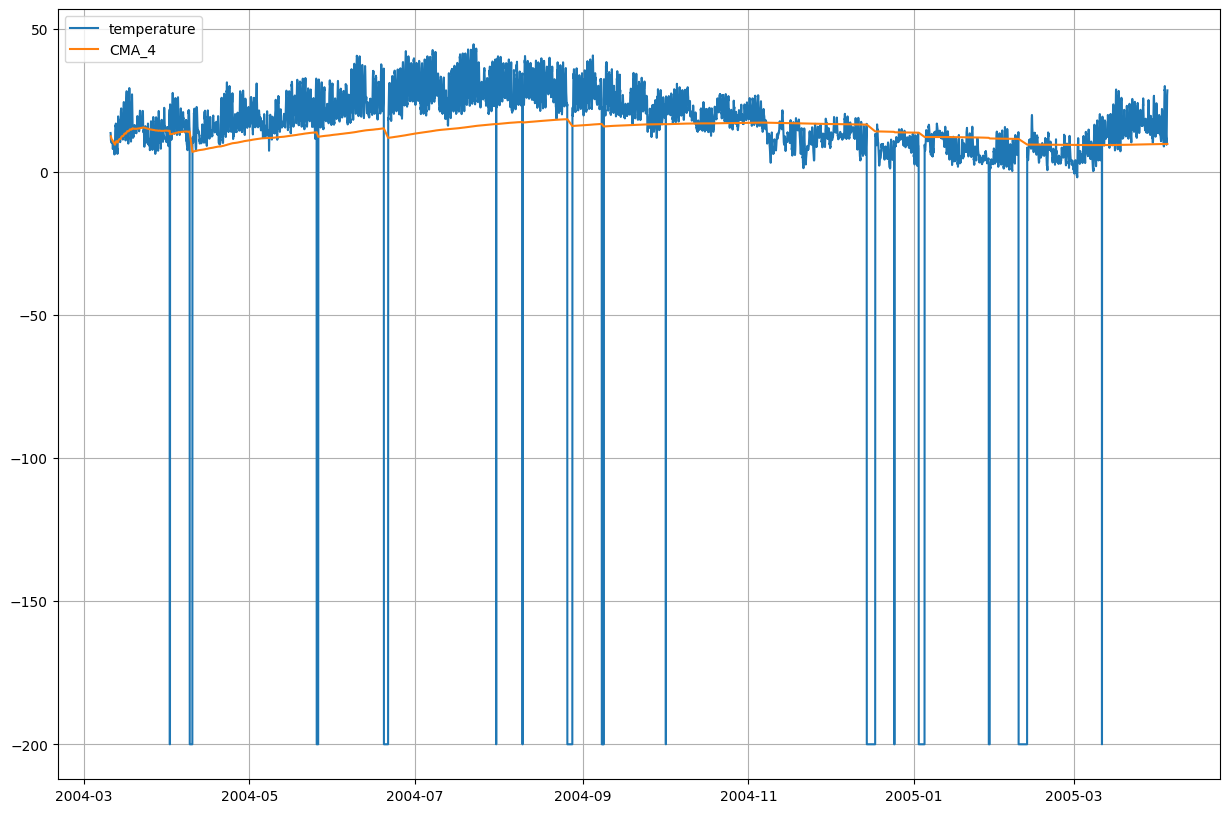

In [63]:
df_T.index = df.DateTime
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df_T['T'],label='temperature')
plt.plot(df_T['CMA_4'],label='CMA_4')
plt.legend(loc=2)

In [66]:
df_T['EMA'] = df_T.iloc[:,0].ewm(span=40, adjust=False).mean()
df_T.head()

,T,CMA_4,EMA
DateTime,,,
2004-03-10 18:00:00,13.6,NaN,13.600000
2004-03-10 19:00:00,13.3,NaN,13.585366
2004-03-10 20:00:00,11.9,NaN,13.503153
2004-03-10 21:00:00,11.0,12.45,13.381048
2004-03-10 22:00:00,11.2,12.20,13.274655


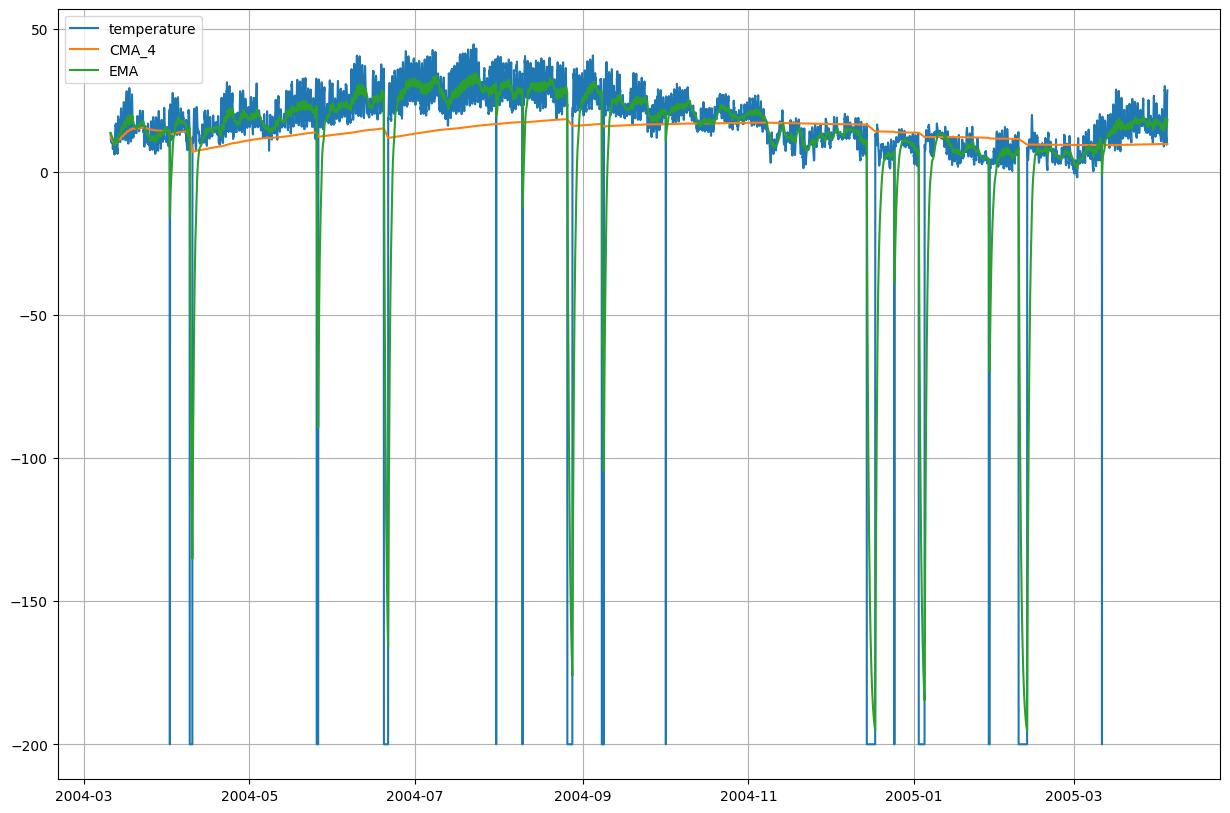

In [67]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df_T['T'],label='temperature')
plt.plot(df_T['CMA_4'],label='CMA_4')
plt.plot(df_T['EMA'],label='EMA')
plt.legend(loc=2)